In [243]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV


import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot') 
import pandas as pd

In [244]:
df = pd.read_csv('/Users/Paul/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-07/starter-code/MASTER_Project7_withNoProbelmPerecent.csv')

In [245]:
df = df.ix[:,1:]

In [246]:
df =df[[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]

In [247]:
df.head() 

Airport  Departure Cancellations  Arrival Cancellations  \
0     SJU                    330.0                  289.0   
1     SJU                    315.0                  282.0   
2     SJU                    257.0                  233.0   
3     SJU                    307.0                  278.0   
4     SJU                    238.0                  197.0   

   Departure Diversions  Arrival Diversions  \
0                  55.0                28.0   
1                  64.0                36.0   
2                  63.0                44.0   
3                  70.0                42.0   
4                  78.0                29.0   

   departures for metric computation  arrivals for metric computation  \
0                            60371.0                          56735.0   
1                            57736.0                          54870.0   
2                            55707.0                          52948.0   
3                            47987.0                          47246.0   
4                            44493.0                          43448.0   

   percent on-time gate departures  percent on-time airport departures  \
0                           0.8019                              0.7794   
1                           0.7789                              0.7464   
2                           0.8054                              0.7446   
3                           0.8014                              0.7522   
4                           0.8004                              0.7810   

   percent on-time gate arrivals              ...                \
0                         0.7984              ...                 
1                         0.7604              ...                 
2                         0.7611              ...                 
3                         0.7414              ...                 
4                         0.7533              ...                 

   average taxi out delay  average airport departure delay  \
0                    2.27                            12.43   
1                    3.03                            14.43   
2                    4.28                            14.34   
3                    3.16                            14.97   
4                    1.85                            13.59   

   average airborne delay  average taxi in delay  average block delay  \
0                    1.88                   0.79                 3.39   
1                    1.63                   1.36                 4.04   
2                    1.73                   1.29                 4.19   
3                    1.55                   1.71                 4.09   
4                    1.64                   1.25                 3.75   

   average gate arrival delay  Arrival Percentage  Departure Percentage  \
0                       12.28            0.994906              0.994534   
1                       14.65            0.994861              0.994544   
2                       14.17            0.995599              0.995387   
3                       16.31            0.994116              0.993602   
4                       15.18            0.995466              0.994651   

   No Diversion Percentage  Overall Chance of No Problems  
0                 0.998582                       0.996007  
1                 0.998224                       0.995876  
2                 0.998030                       0.996339  
3                 0.997648                       0.995122  
4                 0.997567                       0.995894  

[5 rows x 22 columns]

In [260]:
# turn airport into numeric ids with LabelEncoder
le = LabelEncoder()
tmp = le.fit_transform(df['Airport'])
df['Airport'] = tmp

In [262]:
df.head()

Airport  Departure Cancellations  Arrival Cancellations  \
0       66                    330.0                  289.0   
1       66                    315.0                  282.0   
2       66                    257.0                  233.0   
3       66                    307.0                  278.0   
4       66                    238.0                  197.0   

   Departure Diversions  Arrival Diversions  \
0                  55.0                28.0   
1                  64.0                36.0   
2                  63.0                44.0   
3                  70.0                42.0   
4                  78.0                29.0   

   departures for metric computation  arrivals for metric computation  \
0                            60371.0                          56735.0   
1                            57736.0                          54870.0   
2                            55707.0                          52948.0   
3                            47987.0                          47246.0   
4                            44493.0                          43448.0   

   percent on-time gate departures  percent on-time airport departures  \
0                           0.8019                              0.7794   
1                           0.7789                              0.7464   
2                           0.8054                              0.7446   
3                           0.8014                              0.7522   
4                           0.8004                              0.7810   

   percent on-time gate arrivals              ...                \
0                         0.7984              ...                 
1                         0.7604              ...                 
2                         0.7611              ...                 
3                         0.7414              ...                 
4                         0.7533              ...                 

   average taxi out delay  average airport departure delay  \
0                    2.27                            12.43   
1                    3.03                            14.43   
2                    4.28                            14.34   
3                    3.16                            14.97   
4                    1.85                            13.59   

   average airborne delay  average taxi in delay  average block delay  \
0                    1.88                   0.79                 3.39   
1                    1.63                   1.36                 4.04   
2                    1.73                   1.29                 4.19   
3                    1.55                   1.71                 4.09   
4                    1.64                   1.25                 3.75   

   average gate arrival delay  Arrival Percentage  Departure Percentage  \
0                       12.28            0.994906              0.994534   
1                       14.65            0.994861              0.994544   
2                       14.17            0.995599              0.995387   
3                       16.31            0.994116              0.993602   
4                       15.18            0.995466              0.994651   

   No Diversion Percentage  Overall Chance of No Problems  
0                 0.998582                       0.996007  
1                 0.998224                       0.995876  
2                 0.998030                       0.996339  
3                 0.997648                       0.995122  
4                 0.997567                       0.995894  

[5 rows x 22 columns]

In [264]:
# y = df.ix[:,0]
# x= df.ix[:,7:11]

In [329]:
y = df.ix[:,0]
x= df.ix[:,1:]

In [330]:
# # turn airport into numeric ids with LabelEncoder
# le = LabelEncoder()
# le.fit_transform(y)

In [331]:
X = x.as_matrix(columns=None)

In [332]:
k = range(1,50)

kmeansList= []
for i in k:
    kmeans = cluster.KMeans(n_clusters= i)
    kmeans.fit(X)
    labels = kmeans.labels_
    kmeansList.append(metrics.accuracy_score(y, labels))

In [333]:

# k = 8
# kmeans = cluster.KMeans(n_clusters=k)
# kmeans.fit(X)
# labels = kmeans.labels_
# metrics.accuracy_score(y, labels)
# print metrics.classification_report(y, labels)

(array([  6.,   3.,   5.,  13.,   4.,   7.,   0.,   5.,   2.,   4.]),
 array([ 0.        ,  0.00372671,  0.00745342,  0.01118012,  0.01490683,
         0.01863354,  0.02236025,  0.02608696,  0.02981366,  0.03354037,
         0.03726708]),
 <a list of 10 Patch objects>)

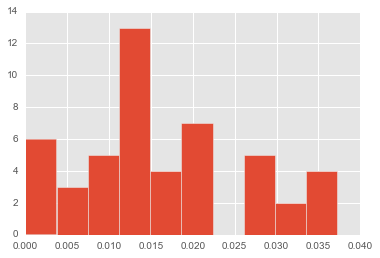

In [334]:
plt.hist(kmeansList)

In [335]:
print(metrics.classification_report(y, labels))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        11
          1       0.00      0.00      0.00        11
          2       0.00      0.00      0.00        11
          3       0.00      0.00      0.00        11
          4       0.00      0.00      0.00        11
          5       0.00      0.00      0.00        11
          6       0.00      0.00      0.00        11
          7       0.00      0.00      0.00        11
          8       0.00      0.00      0.00        11
          9       0.00      0.00      0.00        11
         10       0.00      0.00      0.00        11
         11       0.00      0.00      0.00        11
         12       0.00      0.00      0.00        11
         13       0.05      0.09      0.06        11
         14       0.00      0.00      0.00        11
         15       0.00      0.00      0.00        11
         16       0.00      0.00      0.00        11
         17       0.00      0.00      0.00   

In [336]:
print(metrics.confusion_matrix(y, labels))


[[0 0 5 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [3 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [337]:
metrics.silhouette_score(x, labels, metric='euclidean')


0.53490357007016487

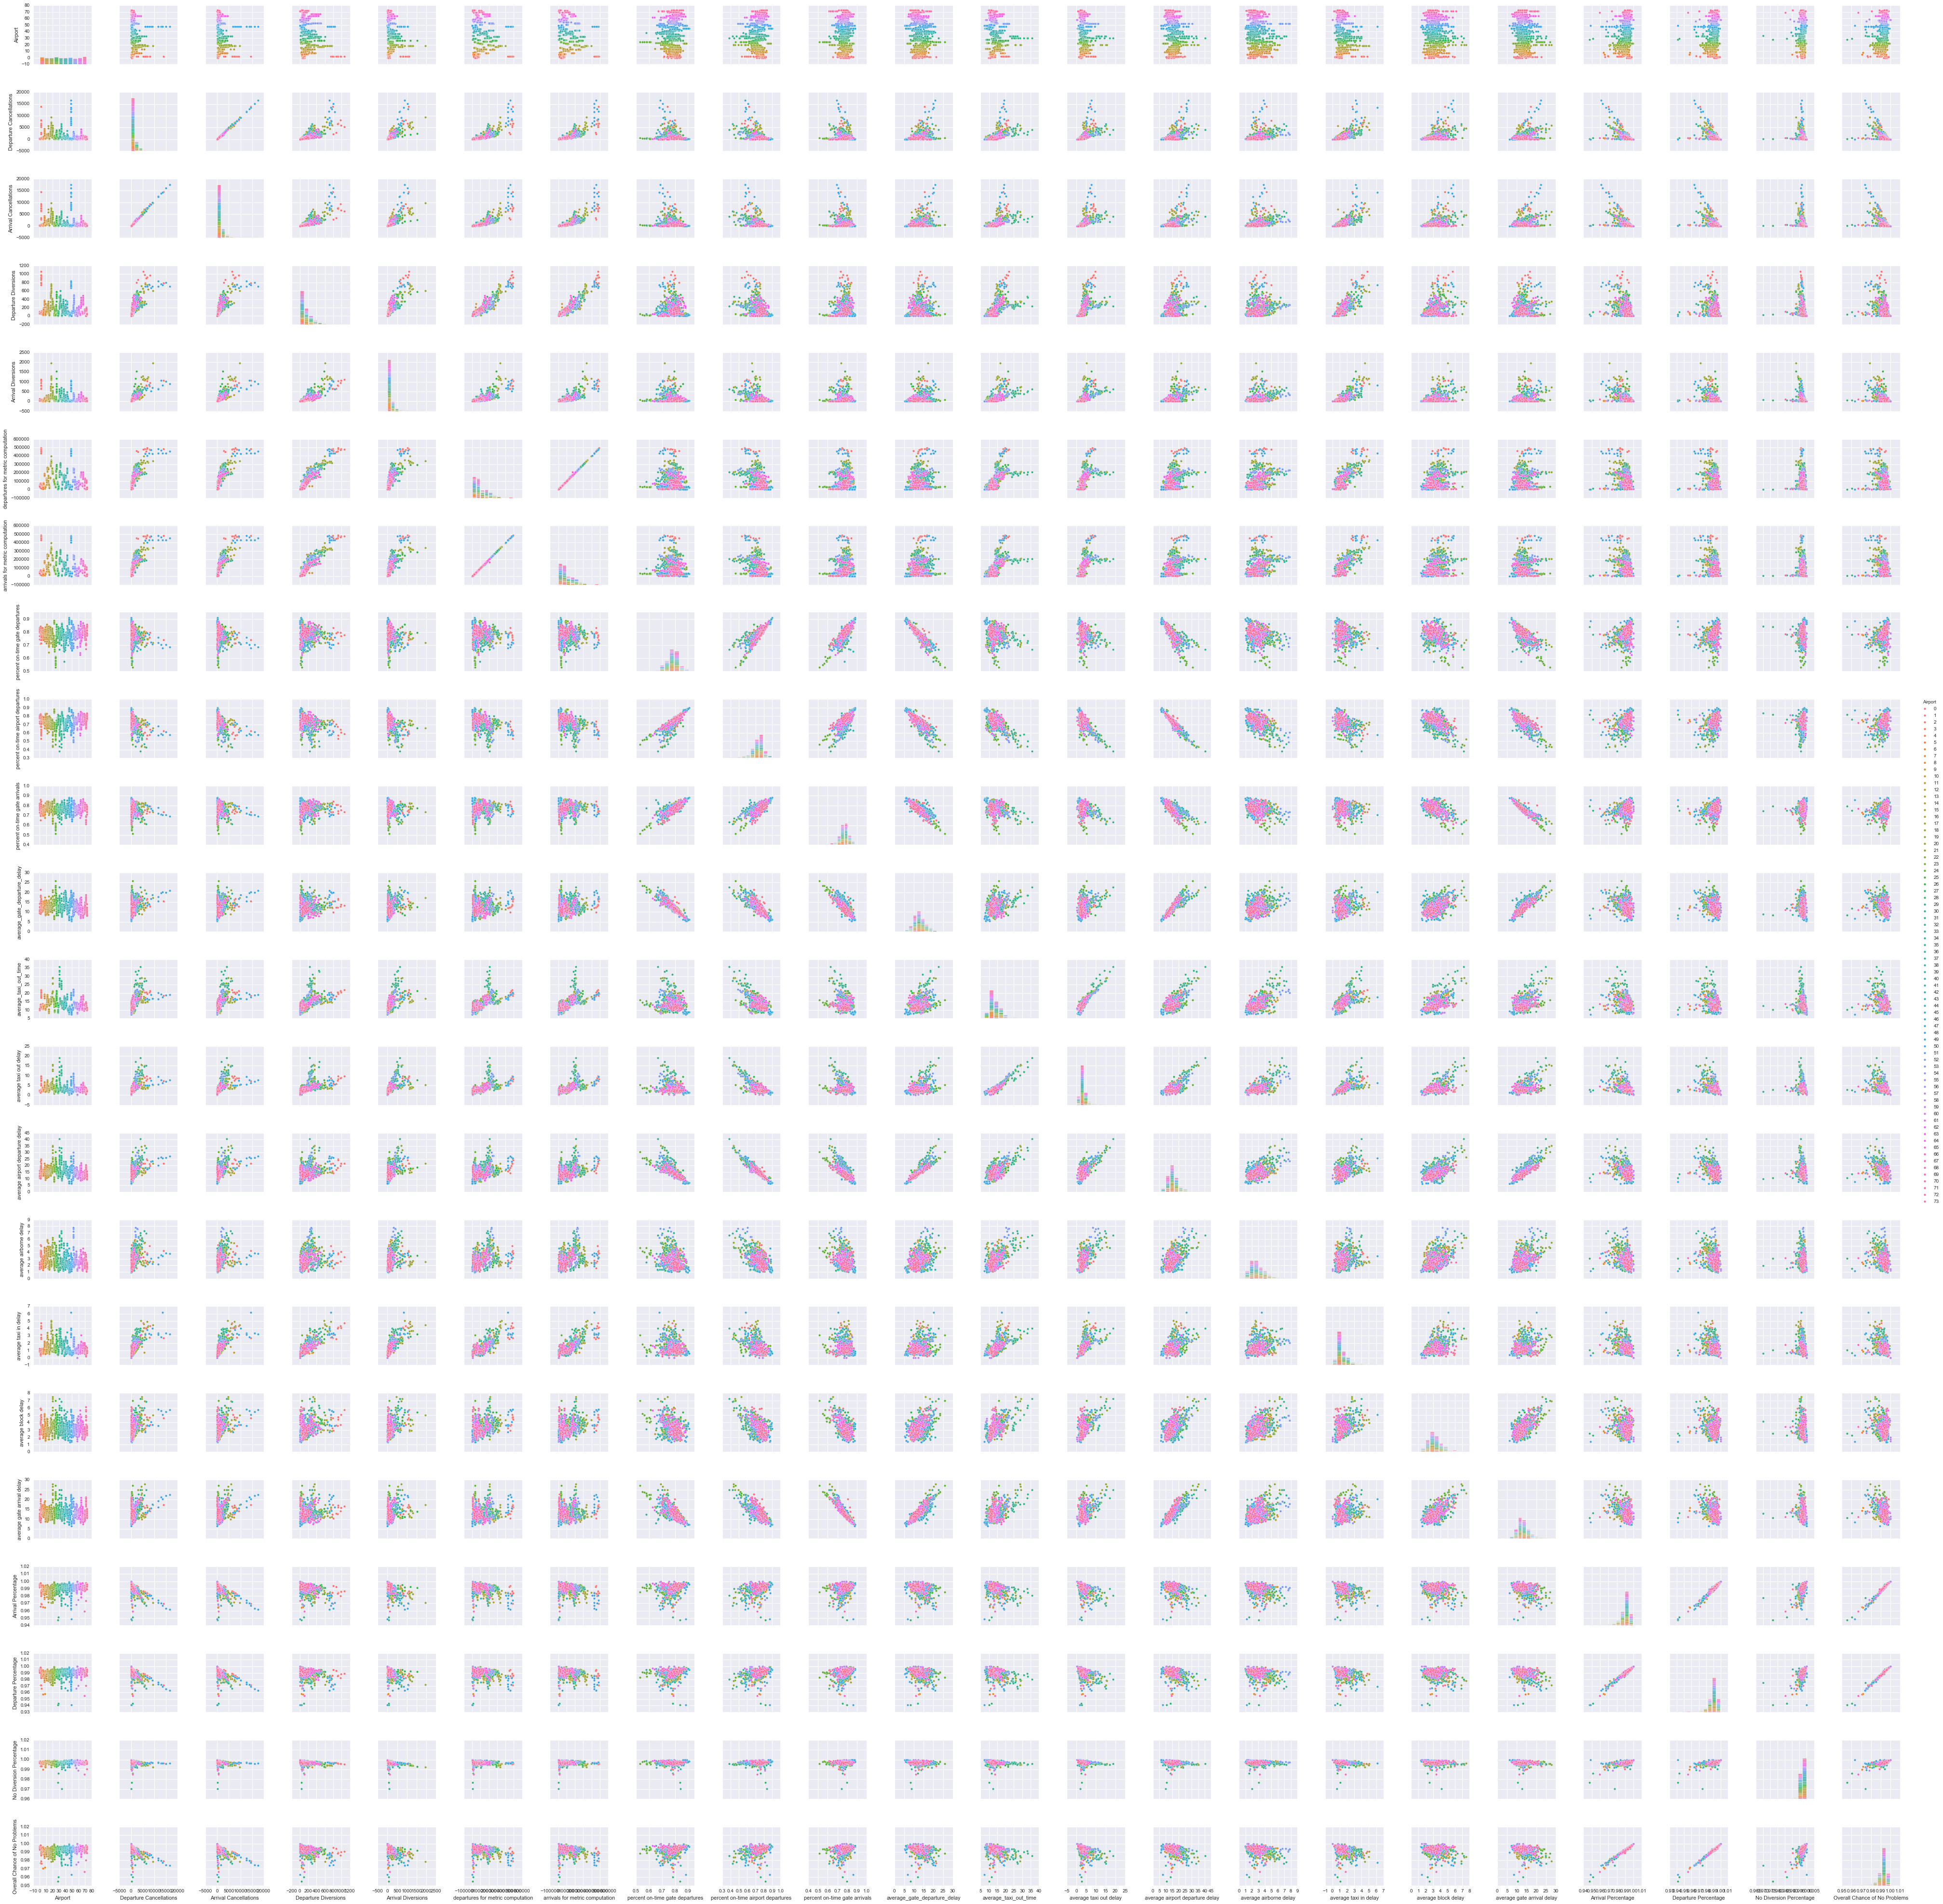

In [338]:
sns.set()
sns.pairplot(df, hue = "Airport")